In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [90]:
data = pd.read_csv ('Delivery_Time.csv')

In [91]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [92]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Data Visualization

In [94]:
# Renaming Columns
dataset=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Corelation Analysis


In [95]:
dataset.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

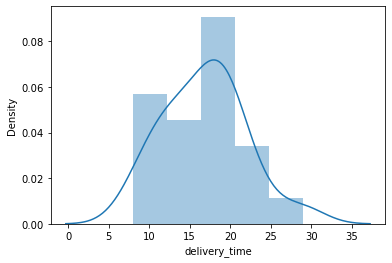

In [96]:
import seaborn as sns
sns.distplot(dataset['delivery_time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

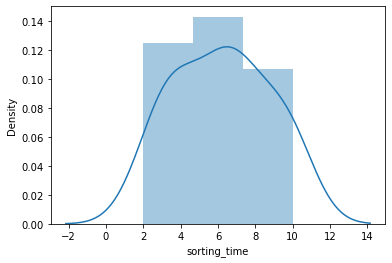

In [97]:
import seaborn as sns
sns.distplot(dataset['sorting_time'])

# Fitting a Linear Regression Model

In [98]:
model = smf.ols('delivery_time ~ sorting_time', data = dataset).fit()

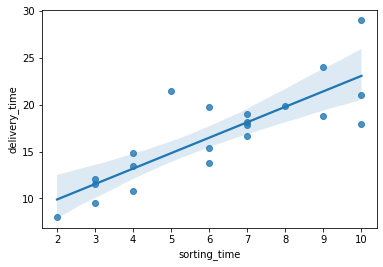

In [99]:
sns.regplot(x="sorting_time", y="delivery_time", data=dataset);

In [100]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

Intercept, Bo:  6.582733971997054
Sorting Time, B1:  1.6490198968312457


In [101]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [102]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Checking predictions of Model by equation



# From the result Bo = 6.582734 and B1 = 1.649020, so our linear regression equation will become Y = Bo + B1X

# Y = 6.582734 + 1.649020*X

In [103]:
predicted_time = model.predict(dataset.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : dataset.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


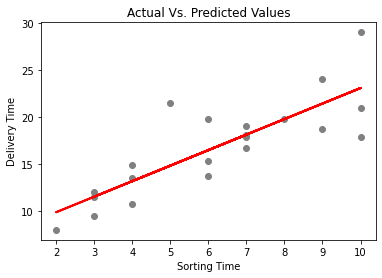

In [104]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset.sorting_time, dataset.delivery_time,  color='gray')
plt.plot(dataset.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(dataset.delivery_time, predicted_time))  
print('Mean Squared Error:',  metrics.mean_squared_error(dataset.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dataset.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(dataset.delivery_time, predicted_time))

Mean Absolute Error: 2.085740955188266
Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


# Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


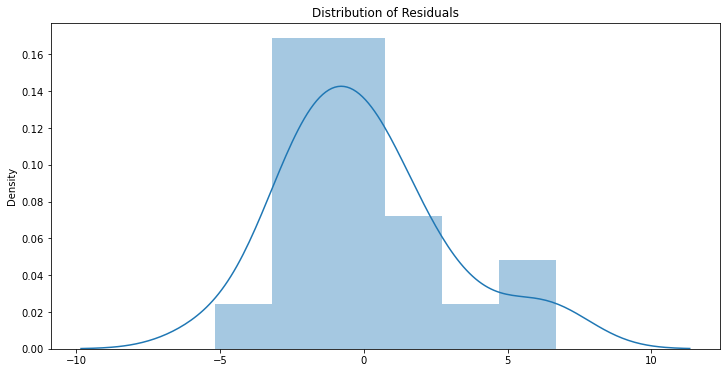

In [63]:
from statsmodels.stats.diagnostic import normal_ad
residuals = dataset.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        00:25:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with Logarithmic Transformation

# Y = a + b * log(x)

In [65]:
# Preparing data for model building
dataset1 = pd.DataFrame.copy(dataset)
dataset1['log_sorting_time'] = np.log(dataset1.sorting_time)
dataset1.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [67]:
# Building model
log_model = smf.ols('delivery_time ~ log_sorting_time', data = dataset1).fit()

# Getting important parameters from model

In [68]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  1.1596835115465822
Sorting Time, B1:  9.04341345820576
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


# Checking predictions of Model by equation

# From the result Bo = 1.1596835115465813 and B1 = 9.043413458205762, so our linear regression equation will become Y = Bo + B1*log(X)

# Y = 1.1596835115465813 + 9.043413458205762*log(X)

In [70]:
predicted_time = log_model.predict(dataset1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : dataset1.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


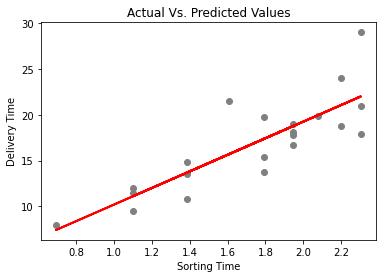

In [71]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset1.log_sorting_time, dataset1.delivery_time,  color='gray')
plt.plot(dataset1.log_sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(dataset1.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(dataset1.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dataset1.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(dataset1.delivery_time, predicted_time))

Mean Absolute Error: 2.0473757067928986
Mean Squared Error: 7.470226320948427
Root Mean Squared Error: 2.7331714766820663
R^2 Score :           0.6954434611324223


# Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.18201104321963033
Residuals are normally distributed


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


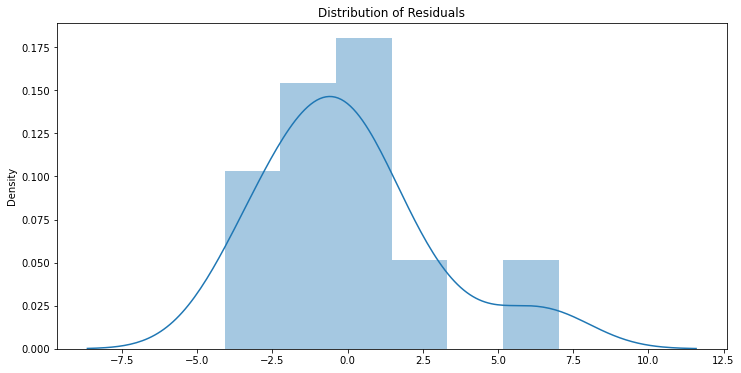

In [73]:
residuals = dataset1.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [74]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        00:34:52   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with square root transformation

# √Y = a + b * X + e

In [75]:
# preparing data to build model
dataset1['sqrt_delivery_time'] = np.sqrt(dataset1.delivery_time)
dataset1.head()

,delivery_time,sorting_time,log_sorting_time,sqrt_delivery_time
0,21.00,10,2.302585,4.582576
1,13.50,4,1.386294,3.674235
2,19.75,6,1.791759,4.444097
3,24.00,9,2.197225,4.898979
4,29.00,10,2.302585,5.385165


In [76]:
# Building model
sqrt_model = smf.ols('sqrt_delivery_time ~ sorting_time', data = dataset1).fit()

# parameters from model

In [77]:
# Coefficients Bo and B1
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.7727310393450333
Sorting Time, B1:  0.2066318180457749
tvalue:  Intercept       13.527452
sorting_time     6.723095
dtype: float64
pvalue:  Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64
R2:  0.704049871541756
R2_Adj:  0.6884735489913221


# Checking predictions of Model by equation

# From the result Bo = 2.7727310393450324 and B1 = 0.20663181804577496, so our linear regression equation will become √Y = Bo + B1X + e

# √Y = 2.7727310393450324 + 0.20663181804577496*X + e

In [78]:
predicted_time = sqrt_model.predict(dataset1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : dataset1.sqrt_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049
5,3.917908,4.012522
6,4.358899,4.219154
7,3.082207,3.392626
8,4.230839,4.839049
9,4.330127,4.632417


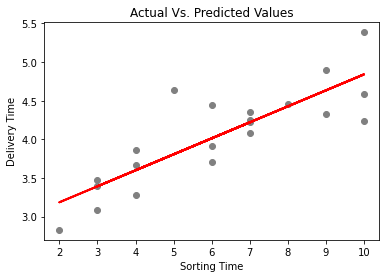

In [79]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset1.sorting_time, dataset1.sqrt_delivery_time,  color='gray')
plt.plot(dataset1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(dataset1.sqrt_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(dataset1.sqrt_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dataset1.sqrt_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(dataset1.sqrt_delivery_time, predicted_time))

Mean Absolute Error: 0.2562892192762892
Mean Squared Error: 0.11045382417324963
Root Mean Squared Error: 0.33234594050965877
R^2 Score :           0.7040498715417561


In [81]:
pred_df = pd.DataFrame({'Actual': (dataset1.sqrt_delivery_time)**2, 'Predicted': (predicted_time)**2})
pred_df

,Actual,Predicted
0,21.00,23.416397
1,13.50,12.954660
2,19.75,16.100332
3,24.00,21.459291
4,29.00,23.416397
5,15.35,16.100332
6,19.00,17.801258
7,9.50,11.509915
8,17.90,23.416397
9,18.75,21.459291


# Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.4177469231053469
Residuals are normally distributed


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


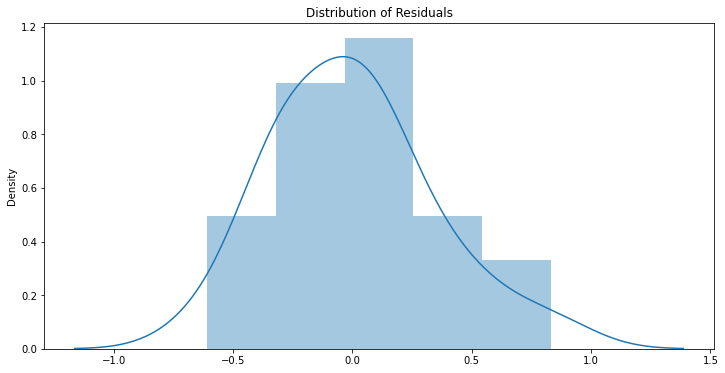

In [82]:
residuals = dataset1.sqrt_delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [83]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.00e-06
Time:                        00:55:37   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

# We have found that while transforming the model,we got various values for MAE, RMSE, MSE and R 2 Values.

# Summery of the following Models

# Simple linear Regression Model


# Mean Absolute Error: 2.0857409551882653 

# Mean Squared Error: 7.793311548584063

# Root Mean Squared Error: 2.7916503270617654

# R^2 Score : 0.6822714748417231

# Logrithm Transformation Model

# Mean Absolute Error: 2.0473757067928995

# Mean Squared Error: 7.470226320948425

# Root Mean Squared Error: 2.733171476682066

# R^2 Score : 0.6954434611324223

# Square-root Transformation Model

# Mean Absolute Error: 0.2562892192762892

 

# Mean Squared Error: 0.11045382417324966

# Root Mean Squared Error: 0.33234594050965877

# R^2 Score : 0.704049871541756